<a href="https://colab.research.google.com/github/VivekRkay/Fastai-Projects/blob/master/Image_Classifier_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Fastai Projects/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.vision import *

In [0]:
path = Path(base_dir + 'data/pets')
path.mkdir(parents=True, exist_ok=True)

In [0]:
folders = ['dogs', 'cats', 'horses', 'cows', 'sheep']

In [6]:
for folder in folders:
  file=folder+'.csv'
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)
  download_images(path/file, dest, max_pics=200)

In [7]:
path.ls()

[PosixPath('/content/gdrive/My Drive/Fastai Projects/data/pets/dogs'),
 PosixPath('/content/gdrive/My Drive/Fastai Projects/data/pets/cats'),
 PosixPath('/content/gdrive/My Drive/Fastai Projects/data/pets/horses'),
 PosixPath('/content/gdrive/My Drive/Fastai Projects/data/pets/cows'),
 PosixPath('/content/gdrive/My Drive/Fastai Projects/data/pets/sheep'),
 PosixPath('/content/gdrive/My Drive/Fastai Projects/data/pets/cats.csv'),
 PosixPath('/content/gdrive/My Drive/Fastai Projects/data/pets/cows.csv'),
 PosixPath('/content/gdrive/My Drive/Fastai Projects/data/pets/dogs.csv'),
 PosixPath('/content/gdrive/My Drive/Fastai Projects/data/pets/horses.csv'),
 PosixPath('/content/gdrive/My Drive/Fastai Projects/data/pets/sheep.csv')]

In [8]:
for c in folders:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

dogs


cats


horses


cows


sheep


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [10]:
data.classes

['cats', 'cows', 'dogs', 'horses', 'sheep']

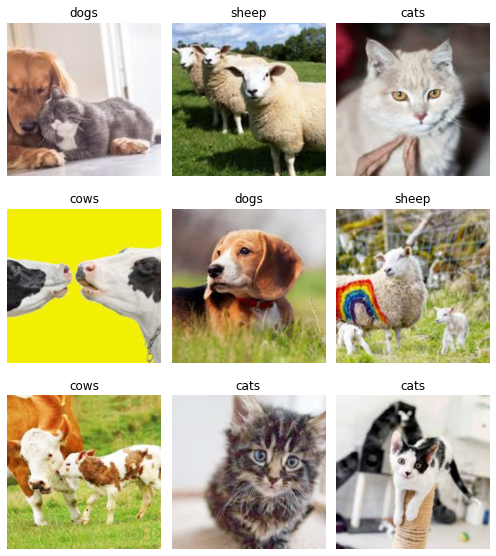

In [11]:
data.show_batch(rows = 3, figsize = (7, 8))

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['cats', 'cows', 'dogs', 'horses', 'sheep'], 5, 800, 200)

In [13]:
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [14]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.611898,0.262627,0.095000,00:14
1,0.890958,0.218360,0.080000,00:14
2,0.629735,0.201964,0.075000,00:14
3,0.488440,0.182093,0.070000,00:14
4,0.393029,0.177322,0.060000,00:14


In [15]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.168158,0.177874,0.060000,00:14
1,0.124234,0.158083,0.050000,00:14
2,0.119549,0.147528,0.040000,00:13
3,0.119882,0.154785,0.050000,00:13
4,0.115217,0.151748,0.050000,00:14


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


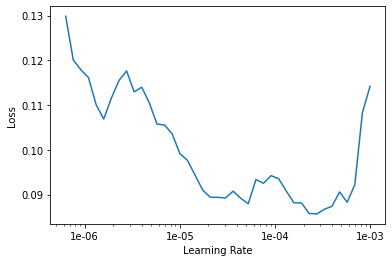

In [19]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(2, max_lr = slice(1e-57, 1e-48))

epoch,train_loss,valid_loss,error_rate,time
0,0.104259,0.155491,0.055000,00:15
1,0.085910,0.160506,0.060000,00:15


In [0]:
learn.save('stage-2')

In [23]:
interp = ClassificationInterpretation.from_learner(learn)

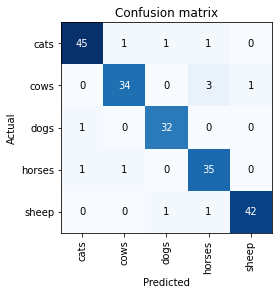

In [24]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

In [0]:
defaults.device = torch.device('cpu')

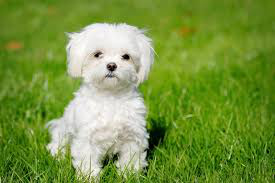

In [28]:
img = open_image(path/'dogs'/'00000002.jpg')
img

In [0]:
learn = load_learner(path)

In [30]:
pred_class, pred_idx, outputs = learn.predict(img)
print(pred_class)

dogs


In [33]:
!setup.py install

/bin/bash: setup.py: command not found


In [34]:
!pip install starlette

     |████████████████████████████████| 61kB 3.3MB/s 


In [0]:
from starlette.applications import Starlette
from starlette.responses import JSONResponse
from starlette.routing import Route